<p>A good description of backpropogation exists at https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/.</p>
<p>This is a practice solution from http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/ using tanh activation function</p>

/Users/mathurtx/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


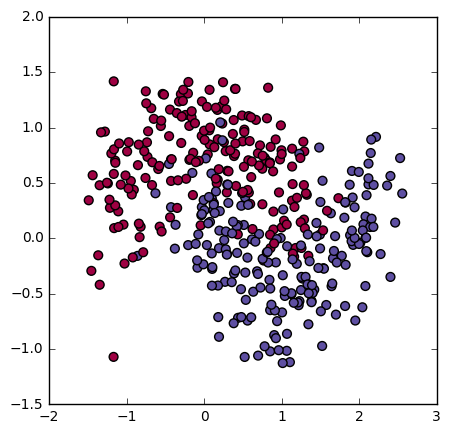

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
# Generate a dataset and plot it
np.random.seed(42)
X, y = sklearn.datasets.make_moons(400, noise=0.30)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [2]:
num_samples = X.shape[0]
nn_input_dim = 2
nn_output_dim = 2
alpha = 0.01
regularization = 0.1

In [3]:
def loss_function(model):
    w1,b1,w2,b2 = model['w1'], model['b1'], model['w2'], model['b2']
    z1 = X.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    probs = np.exp(z2) / np.sum(np.exp(z2), axis=1, keepdims=True)
    corect_logprobs = -np.log(probs[range(num_samples), y])
    data_loss = np.sum(corect_logprobs)
    data_loss += regularization/2 * (np.sum(np.square(w1)) + np.sum(np.square(w2)))
    return 1./num_samples * data_loss

In [4]:
def predict(model, x):
    w1,b1,w2,b2 = model['w1'], model['b1'], model['w2'], model['b2']
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    probs = np.exp(z2) / np.sum(np.exp(z2), axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [9]:
def train_nn(hidden_layer_dim, num_epochs=20000, loss_print=False):
    np.random.seed(0)
    w1 = np.random.randn(nn_input_dim, hidden_layer_dim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, hidden_layer_dim))
    w2 = np.random.randn(hidden_layer_dim, nn_output_dim) / np.sqrt(hidden_layer_dim)
    b2 = np.zeros((1, nn_output_dim))
    
    #intialize model as a dictionary
    model = {}
    
    for i in xrange(0,num_epochs):
        #Forward propogation
        z1 = X.dot(w1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(w2) + b2
        probs = np.exp(z2)/ np.sum(np.exp(z2), axis=1, keepdims=True)
        
        #Backpropogration algorithm
        delta3 = probs
        delta3[range(num_samples),y] -=1
        dw2 = (a1.T).dot(delta3) + regularization * w2
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(w2.T)*(1 - np.power(a1, 2))
        dw1 = np.dot(X.T, delta2) + regularization * w1
        db1 = np.sum(delta2, axis=0)
       
        # Update weights & bias
        w1 += -alpha * dw1
        b1 += -alpha * db1
        w2 += -alpha * dw2
        b2 += -alpha * db2
        
        # Assign new parameters to the model
        model = { 'w1': w1, 'b1': b1, 'w2': w2, 'b2': b2}
       
        if loss_print and i % 1000 == 0:
          print "Loss after iteration %i: %f" %(i, loss_function(model))
    
    return model
        

In [10]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Loss after iteration 0: 2.158324
Loss after iteration 1000: 0.308790
Loss after iteration 2000: 0.329760
Loss after iteration 3000: 0.278761
Loss after iteration 4000: 0.279235
Loss after iteration 5000: 0.278174
Loss after iteration 6000: 0.277878
Loss after iteration 7000: 0.277781
Loss after iteration 8000: 0.277738
Loss after iteration 9000: 0.277719
Loss after iteration 10000: 0.277711
Loss after iteration 11000: 0.277699
Loss after iteration 12000: 0.277667
Loss after iteration 13000: 0.277601
Loss after iteration 14000: 0.277537
Loss after iteration 15000: 0.277609
Loss after iteration 16000: 0.276874
Loss after iteration 17000: 0.277162
Loss after iteration 18000: 0.276920
Loss after iteration 19000: 0.278360


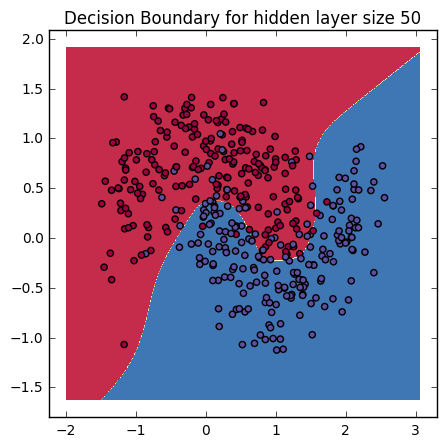

In [11]:

# Build a model with a 3-dimensional hidden layer
model = train_nn(50, loss_print=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 50")